In [3]:
import matplotlib.pyplot as plt
import json
import os
from statistics import mean
import csv
# import kernelmark/src/finalise

In [9]:
def finalise_ipbench(f):
    """
    Retrieve unmarshalled results from machine by kernel version and generate graphs.
    """

    plt.clf()
    y_range = []
    x_range = []


    csv = ipbench_csv(f)
    requested = []
    achieved = []

    # Plot requested vs. achieved throughput
    for i in range(0, len(csv["Requested_throughput"])):
        requested.append(csv["Requested_throughput"][i])
        achieved.append(csv[f"Achieved_throughput_sent"][i])

        # Ranging info
        if csv[f"Achieved_throughput_sent"][i] not in y_range:
            y_range.append(csv[f"Achieved_throughput_sent"][i])
        if csv["Requested_throughput"][i] not in x_range:
            x_range.append(csv["Requested_throughput"][i])
            x_range.append(csv["Achieved_throughput_sent"][i])
        # convert to megabits
    for i in range(len(requested)):
        requested[i] = int(requested[i]) / (10**6)
        achieved[i] = int(achieved[i]) / (10**6)
    print(f"Requested: {requested} \n Achieved: {achieved}")
    plt.plot(requested, achieved, label=f"6.1.1 - sent")

    
    if x_range == [] or y_range == []:
        print("No results! Exiting")
        exit(0)
    
    # convert axes to megabits
    for i in range(len(x_range)):
        x_range[i] = int(x_range[i]) / 10**6
    for i in range(len(y_range)):
        y_range[i] = int(y_range[i]) / 10**6
    
    
    plt.xlabel("Requested throughput (MBit/s)")
    plt.ylabel("Achieved throughput (MBit/s)")
    plt.title(f"ipbench Requested vs Achieved throughput (sent)")
    plt.yticks(ticks(y_range, 10))
    plt.xticks(ticks(x_range, 10))
    ax = plt.gca()
    ax.legend()
    ax.yaxis.set_major_formatter('{x:9<5.1f}')
    plt.savefig(f"{f}.png")

def ipbench_csv(path):
    """
    Python's csv library is awful apparently so I need to do this myself.
    Given a csv file with the first row containing headers, return a dict
    """
    out = {}
    with open(path, "r") as f:
        first = True
        headers = []
        for row in f:
            # get headers from first row
            if first:
                first = False
                for term in row.split(','):
                    headers.append(term)
                    out[term] = []
            # get rest
            else:
                i = 0
                for term in row.split(','):
                    out[headers[i]].append(term)
                    i += 1
    return out
    # now how hard was that? why can the python csv library not find the headers properly??

def ticks(data, num_ticks):
    """((float(p) * 8) / IDEAL_LATENCY) / 1000or a dataset
    """
    minimum = int(min(data))
    maximum = int(max(data)) + 1

    # If it's not possible to create integer ticks, do it the goofy way
    if (maximum - minimum) < num_ticks:
        return [min(data), max(data)]
    
    num_ticks = int((maximum - minimum)/10) 
    return range(minimum, maximum, num_ticks)

Requested: [97.483443, 194.966887, 292.450331, 389.933774, 487.417218, 584.900662, 682.384105, 779.867549, 877.350993] 
 Achieved: [97.502113, 194.974429, 292.365985, 389.723557, 484.277265, 564.186526, 677.611252, 636.27155, 603.986091]


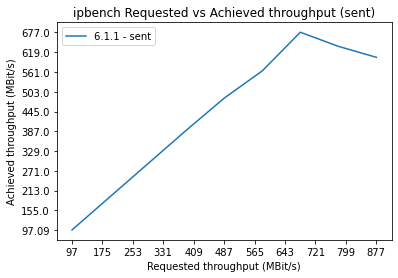

In [16]:

finalise_ipbench("6.1.1-singleclient-1-clean")



Requested: [97.483443, 194.966887, 292.450331, 389.933774, 487.417218, 584.900662, 682.384105, 779.867549, 877.350993] 
 Achieved: [97.494721, 194.951189, 292.359116, 389.785928, 483.529691, 564.905031, 678.11918, 640.646376, 601.715472]


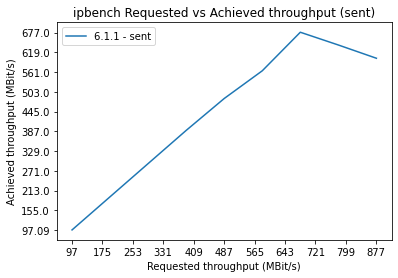

In [14]:
finalise_ipbench("6.1.1-singleclient-2-clean")

Requested: [97.483443, 194.966887, 292.450331, 389.933774, 487.417218, 584.900662, 682.384105, 779.867549, 877.350993] 
 Achieved: [97.478694, 194.972908, 292.384458, 389.70085, 483.937325, 565.647304, 677.727342, 636.573456, 599.071694]


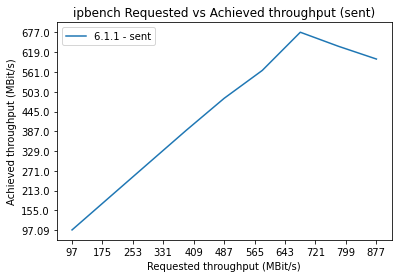

In [15]:
finalise_ipbench("6.1.1-singleclient-3-clean")

[9, 19, 292, 389, 487, 584, 682, 779, 877]


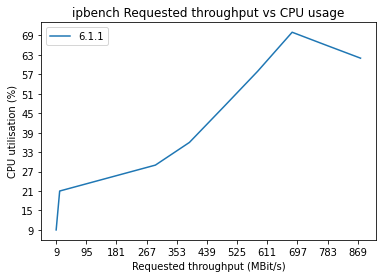

In [30]:
bws = [9748344,
19496688,
292450331,
389933774,
487417218,
584900662,
682384105,
779867549,
877350993]

cpus = [9, 21, 29, 36, 47, 58, 70, 66, 62]

x_range = bws.copy()
y_range = cpus.copy()

for i in range(len(x_range)):
    x_range[i] = int(x_range[i]/ (10**6))

print(x_range)

plt.clf()
plt.plot(x_range, y_range, label=f"6.1.1")
plt.xlabel("Requested throughput (MBit/s)")
plt.ylabel("CPU utilisation (%)")
plt.title(f"ipbench Requested throughput vs CPU usage")
plt.yticks(ticks(y_range, 10))
plt.xticks(ticks(x_range, 10))
ax = plt.gca()
ax.legend()
# ax.yaxis.set_major_formatter('{x:9<5.1f}')
plt.savefig(f"cpu.png")